In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from hypothesis_tests import correlation, chatterjee

In [49]:
import matplotlib as mpl

mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['xtick.labelsize'] = 13
mpl.rcParams['ytick.labelsize'] = 13
mpl.rcParams["axes.labelsize"] = 18
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['axes.titlesize'] = 20
mpl.rcParams['text.usetex'] = True

In [5]:
df = pd.read_csv("data/galton_peas_data.csv", header=0)
df.head()

,parent,child
0,21,14.67
1,21,14.67
2,21,14.67
3,21,14.67
4,21,14.67


In [6]:
x = df["parent"].to_numpy()
y = df["child"].to_numpy()

Text(0, 0.5, 'child')

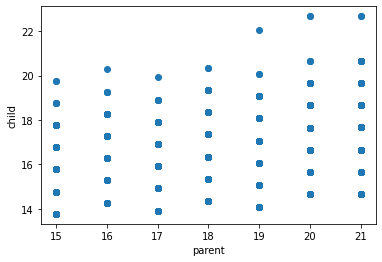

In [12]:
plt.scatter(x, y)
plt.xlabel("parent")
plt.ylabel("child")

Text(0.5, 0, 'child')

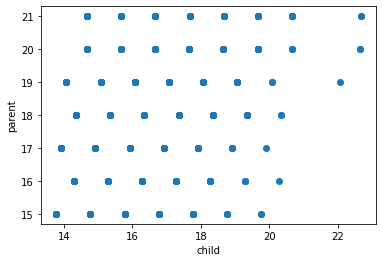

In [13]:
plt.scatter(y, x)
plt.ylabel("parent")
plt.xlabel("child")

In [58]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [26]:
df_unique = df.value_counts()

pandas.core.indexes.multi.MultiIndex

array([(15, 13.77), (17, 13.92), (19, 14.07), (16, 14.28), (18, 14.35),
       (20, 14.66), (21, 14.67), (21, 18.67), (20, 18.66), (16, 16.28)],
      dtype=object)

In [38]:
df_unique = df.value_counts()
index = df_unique.index
y_unique = np.array([item[0] for item in index])
x_unique = np.array([item[1] for item in index])

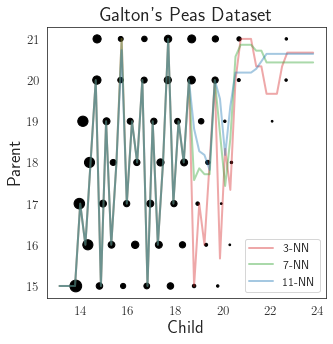

In [62]:
sns.set_style("white")
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

colors = ["tab:red", "tab:green", "tab:blue"]
for i, k in enumerate([3, 7, 11]):
    model = KNeighborsRegressor(n_neighbors=k).fit(y.reshape(-1, 1), x)
    y_plot = np.linspace(0.95 * y.min(), 1.05 * y.max(), 50)
    x_pred = model.predict(y_plot.reshape(-1, 1))
    ax.plot(y_plot, x_pred, alpha=0.4, label=f"{k}-NN", c=colors[i])
ax.scatter(x_unique, y_unique, s=3 * df_unique.values, c="k")
ax.legend(loc="lower right")
ax.set_ylabel("Parent")
ax.set_xlabel("Child")
ax.set_title("Galton's Peas Dataset")
plt.savefig("figs/galton_peas.pdf")

In [7]:
# Should be close to 0.35.
correlation(x, y)

0.3463318849231738

In [ ]:
n_sims = 1000

results = np.array([new_correlation(x, y) for _ in range(n_sims)])
stats = results[:, 0]
pvals = results[:, 1]

# Should be close to 0.11.
print(stats.mean())
print(stats.std() / np.sqrt(n_sims))

In [ ]:
# Average pval?
print(pvals.mean())
print(pvals.std() / np.sqrt(n_sims))

In [ ]:
n_sims = 1000

stats = np.array([new_correlation(y, x)[0] for _ in range(n_sims)])

# Should be close to 0.92.
print(stats.mean())
print(stats.std() / np.sqrt(n_sims))